<a href="https://colab.research.google.com/github/ChintzRuparel/Image-Processing/blob/main/IP_Expt_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IP Experiment No. 05
Image Enhancement using spatial domain filters (neighborhood processing)<br>



Aim:<br>

Apply a suitable spatial domain filtering technique to three images.<br>
i.	Blur the image.<br>
ii.	Sharpen the image.<br>
iii.	Remove salt and pepper noise


Neighborhood processing in spatial domain: <br>

Here, to modify one pixel, we consider values of the immediate neighboring pixels also. For this purpose, 3X3, 5X5 or 7X7 neighborhood mask can be considered. Example of 3X3 mask is shown below. <br>

f(x-1,y-1) f(x-1,y) f(x-1,y+1)<br>
f(x,y-1) f(x,y) f(x,y+1) <br>
f(x+1,y-1) f(x+1,y) f(x+1,y+1) <br>

# Low Pass filtering for blurring

It is also known as smoothing filter. It removes the high frequency content from the image. It is also used to blurr an image. Low pass averaging filter mask is as shown.<br>

1/9 1/9 1/9<br>
1/9 1/9 1/9<br>
1/9 1/9 1/9<br>

the pixel which is to be filtered is processed with mask as shown in example below<br>
The pixel with value 106 after applying mask is converted to 115.<br>
The mask is shifted pixel by pixel and the process is repeated till all pixels are covered.


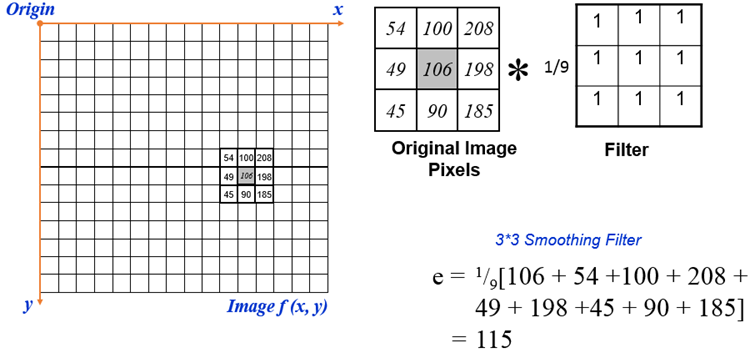

In [ ]:
#import cv2, numpy, matplotlib
import cv2 
from skimage import io
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 


Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

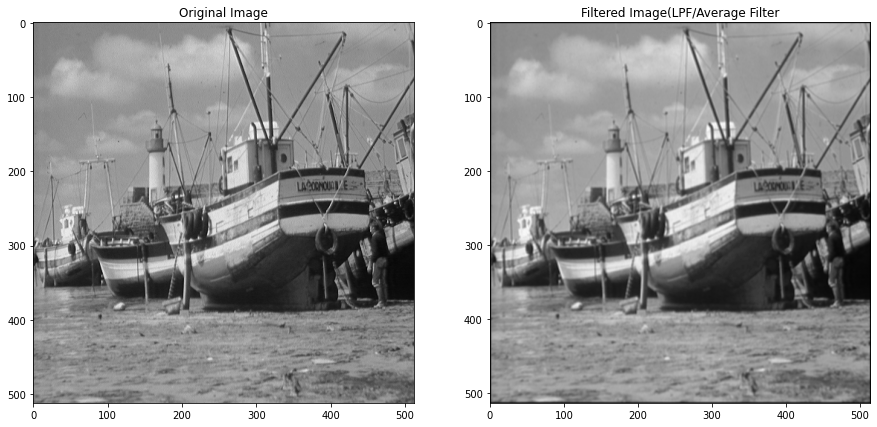

In [ ]:
img=cv2.imread('boat.png', 0)
mask=np.ones([3,3], dtype=int)
mask=mask/9
# mask=np.ones([7,7], dtype=int)
# mask=mask/49
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")


Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

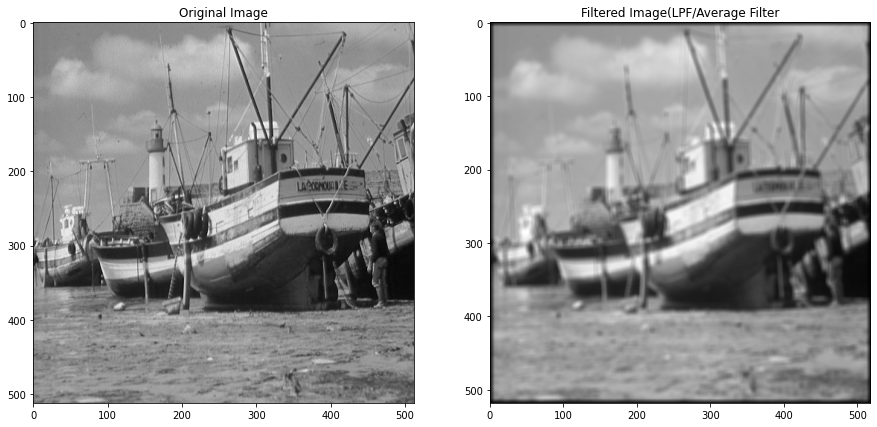

In [ ]:
img=cv2.imread('boat.png', 0)
#mask=np.ones([3,3], dtype=int)
#mask=mask/9
mask=np.ones([7,7], dtype=int)
mask=mask/49
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")


Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

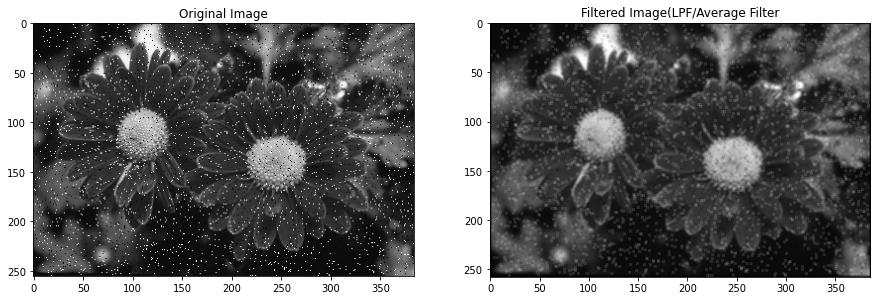

In [ ]:
img=cv2.imread('saltnpepper.png', 0)
mask=np.ones([3,3], dtype=int)
mask=mask/9
# mask=np.ones([7,7], dtype=int)
# mask=mask/49
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")


# High Pass Filtering in Spatial Domain- Laplacian Mask

It eliminates low frequency regions while retaining or enhancing the high frequency components (sharp edges). High pass filtering is done using Laplacian filtering mask as shown below : <br>           
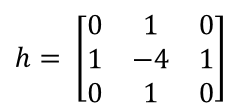


The high pass filtering operation for a pixel is as illustrated below:
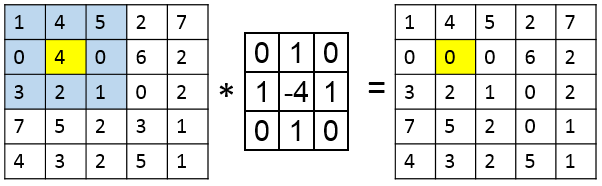

The high pass filtering process (convolution) of each pixel with the mask is carried out till all pixels are covered as shown below:


Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

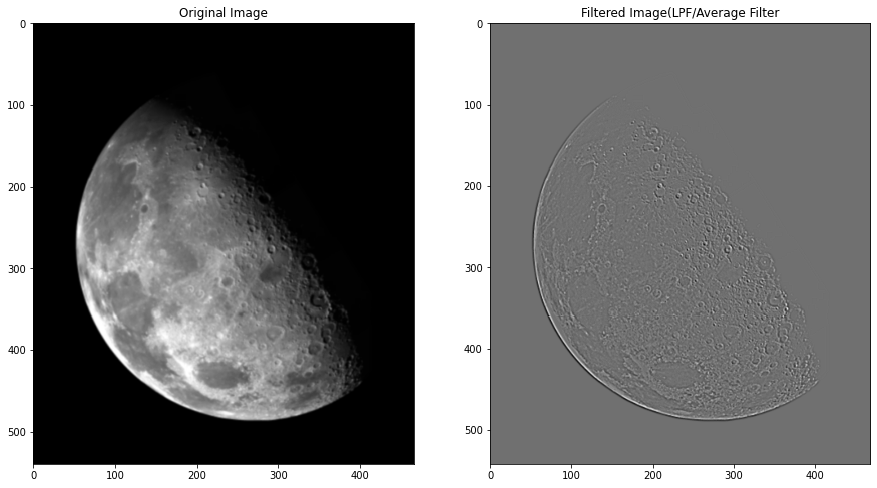

In [ ]:
img=cv2.imread('Blurr_moon.tif', 0)
mask=[[0,-1,0],[-1,4,-1],[0,-1,0]]
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")


Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

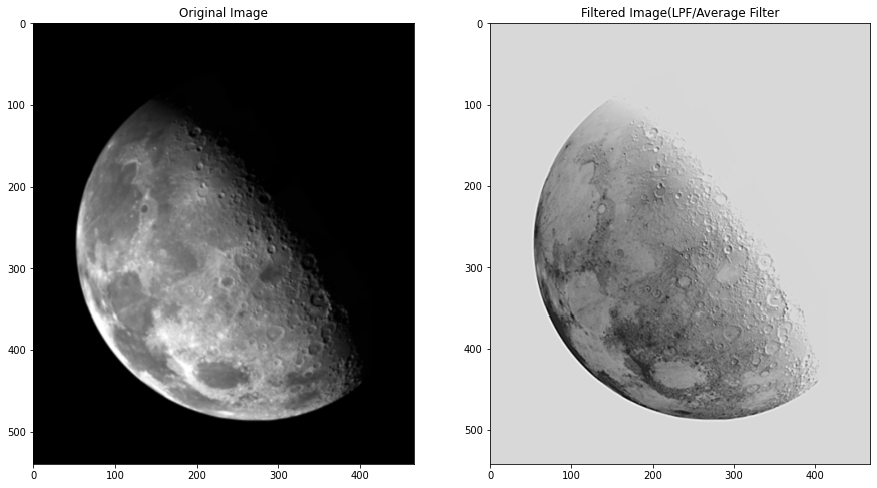

In [ ]:
img=cv2.imread('Blurr_moon.tif', 0)
mask=[[0,1,0],[1,-5,1],[0,1,0]]
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")

Text(0.5, 1.0, 'Filtered Image(LPF/Average Filter')

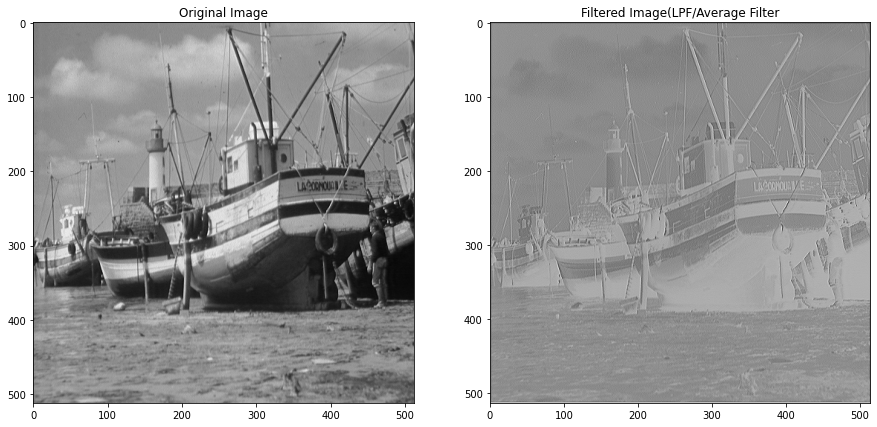

In [ ]:
img=cv2.imread('boat.png', 0)
mask=[[0,1,0],[1,-5,1],[0,1,0]]
output=signal.convolve2d(img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output, cmap="gray")
plt.title("Filtered Image(LPF/Average Filter")

The above result of appling HPF to the image provide sharp edges.<br>
However we want the sharpened image for this we used enhanced laplacian mask <br>
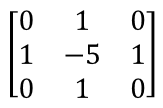

The pixel by pixel processing of image using the enhanced lapacian mask is as showon below:<br>
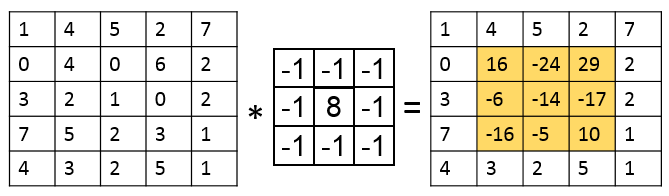

the above Laplacian mask provides the edges. However we want the sharpened image we have to use ENHANCED LAPLACIAN MASK AS SHOWN BELOW:

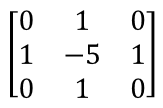

# Median Filtering for salt and pepper image <br>

It is used to eliminate salt and pepper noise. Here the pixel value is replaced by median value of the neighbouring pixel.

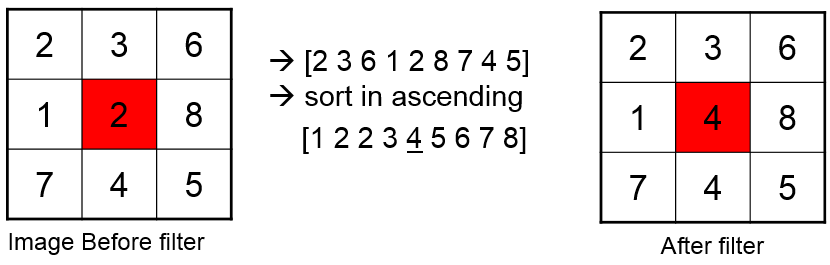

Text(0.5, 1.0, 'Filtered image')

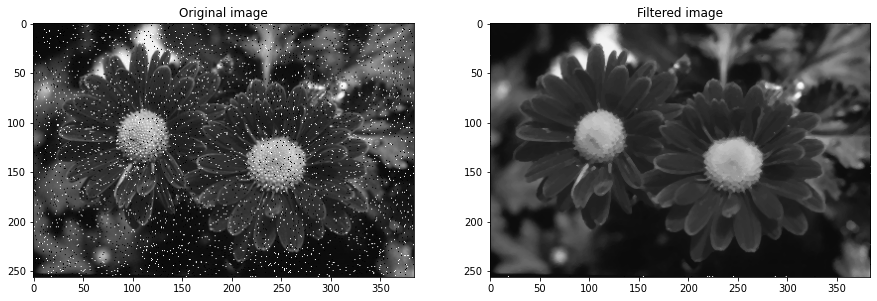

In [ ]:
# read the image
img=cv2.imread('saltnpepper.png',0)

# take the rows and columns of the image
r,c=img.shape

# create an array of zeros of same size as image
I=img.copy()

#apply for loop, take the 8 neighbours of each pixel, sort the values and pick the middle vaule i.e. at index[4]
for i in range(1,r-1):
  for j in range(1,c-1):
    temp=[img[i-1,j-1],img[i-1,j],img[i-1,j+1],img[i,j-1],img[i,j],img[i,j+1],img[i+1,j-1],img[i+1,j],img[i+1,j+1]]
    S=sorted(temp)
    img[i,j]=S[4]


# plot the original and filtered image
plt.figure (figsize=(15,15))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Filtered image')





# Conclusion :

1. We implemented the code for low past filtering using average filter with a mask of size 3x3 and 7x7.
2. It was observed that the average filter created a blurring effect. 
3. Average Filter is used for noise removal on an image as it blurs the noise. 
4. A larger size mask results in more blurring Therefore for noise removal we use a 3x3 mask. 
5. The result of average filter was also tested on salt and pepper noisy image. Average Filter is not a good choice for Salt and Pepper Noise removal. 
6. We implemented the code for high pass filtering of an image using laplacian mask and its variants.
7. Laplacian Mask provides edge detection. 
8. High Pass filtering (Sharpen Image) is obtained by using enhanced laplacian mask. 
9. We implemented the code for median filtering. We tested the code for median fliter on salt and pepper noisy image. 
10. Median Filter successfully removed the noise as compare to average Filter as it selects the median value and discards the low value and high value 